In [1]:
import torch.nn as nn
import torch
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision.transforms import transforms as T
from torch import optim
from tqdm import tqdm
import torch.utils.data as data_utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data1 = pd.read_csv("podaci_FF_popunjeno.csv")

In [3]:
data1.isna().sum()

DateTime                                        0
T                                               0
P                                               0
U                                               0
Ff                                              0
Nh                                              0
H                                           53192
VV                                          41399
sss                                             0
DD_Calm, no wind                                0
DD_Wind blowing from the east                   0
DD_Wind blowing from the east-northeast         0
DD_Wind blowing from the east-southeast         0
DD_Wind blowing from the north                  0
DD_Wind blowing from the north-east             0
DD_Wind blowing from the north-northeast        0
DD_Wind blowing from the north-northwest        0
DD_Wind blowing from the north-west             0
DD_Wind blowing from the south                  0
DD_Wind blowing from the south-east             0


In [4]:
y = data1["VV"]

In [5]:
y = y.dropna()

In [6]:
len(y)

37067

In [7]:
y

34883     2.0
34884     3.0
34885     3.0
34886     2.0
34887     3.0
         ... 
78461    20.0
78462    10.0
78463    10.0
78464    10.0
78465    10.0
Name: VV, Length: 37067, dtype: float64

In [8]:
X = data1.dropna(subset=["VV"])

In [9]:
X.describe(include='all')

,DateTime,T,P,U,Ff,Nh,H,VV,sss,"DD_Calm, no wind",...,DD_Wind blowing from the north-west,DD_Wind blowing from the south,DD_Wind blowing from the south-east,DD_Wind blowing from the south-southeast,DD_Wind blowing from the south-southwest,DD_Wind blowing from the south-west,DD_Wind blowing from the west,DD_Wind blowing from the west-northwest,DD_Wind blowing from the west-southwest,DD_variable wind direction
count,37067,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,25274.000000,37067.000000,37067.000000,37067.000000,...,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000
unique,37067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-10-29 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.615662,1010.318561,71.597378,2.928265,36.679661,1538.934280,13.546510,0.029460,0.069873,...,0.054442,0.074568,0.094639,0.050395,0.039577,0.042059,0.125907,0.058219,0.055629,0.000620
std,NaN,9.583132,43.465644,19.945085,2.144161,35.559853,915.515122,7.059006,0.754487,0.254937,...,0.226891,0.262696,0.292720,0.218762,0.194966,0.200726,0.331749,0.234160,0.229207,0.024902
min,NaN,-16.100000,742.600000,15.000000,0.000000,0.000000,25.000000,0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.900000,1011.900000,56.000000,1.000000,0.000000,800.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,12.500000,1016.500000,74.000000,2.000000,40.000000,1750.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,19.900000,1022.300000,89.000000,4.000000,60.000000,2600.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
X = X.drop(["VV", "H"], axis = 1)

In [11]:
X.describe()

,T,P,U,Ff,Nh,sss,"DD_Calm, no wind",DD_Wind blowing from the east,DD_Wind blowing from the east-northeast,DD_Wind blowing from the east-southeast,...,DD_Wind blowing from the north-west,DD_Wind blowing from the south,DD_Wind blowing from the south-east,DD_Wind blowing from the south-southeast,DD_Wind blowing from the south-southwest,DD_Wind blowing from the south-west,DD_Wind blowing from the west,DD_Wind blowing from the west-northwest,DD_Wind blowing from the west-southwest,DD_variable wind direction
count,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,...,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000,37067.000000
mean,12.615662,1010.318561,71.597378,2.928265,36.679661,0.029460,0.069873,0.069927,0.031376,0.070629,...,0.054442,0.074568,0.094639,0.050395,0.039577,0.042059,0.125907,0.058219,0.055629,0.000620
std,9.583132,43.465644,19.945085,2.144161,35.559853,0.754487,0.254937,0.255028,0.174333,0.256207,...,0.226891,0.262696,0.292720,0.218762,0.194966,0.200726,0.331749,0.234160,0.229207,0.024902
min,-16.100000,742.600000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,1011.900000,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.500000,1016.500000,74.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.900000,1022.300000,89.000000,4.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38.700000,1048.300000,100.000000,17.000000,100.000000,44.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, test_size = 0.2)

In [13]:
class FillModel(nn.Module):
    def __init__(self):
        super(FillModel, self).__init__()
                    
        self.fnn = nn.Sequential(
            nn.Linear(24, 64),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(p = 0.2),
            
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Dropout(p = 0.2),

            nn.Linear(32, 1),
            nn.ReLU(),
        )
        
    def forward(self, input):
        return self.fnn(input)

In [14]:
def trainLoop(fnn, trainLoader):
    fnn.train()
    optimizer = optim.Adam(fnn.parameters())
    criterion = torch.nn.MSELoss()
    
    i = 0
    counterTrain = []
    lossHistoryTrain = []

    j = 0
    counterVal = []
    lossHistoryVal = []
    epochsSinceLastImprovement = 0
    bestLoss = None
    
    for epoch in tqdm(range(60)):
        
        epochLoss = 0
        
        for batch_idx, (data, target) in enumerate(trainLoader):

            optimizer.zero_grad()

            data, target = data.to(device), target.to(device)

            #print(data.shape)
            output = fnn(data)

            loss = criterion(output, target)
            epochLoss += loss.item()
            loss.backward()
            optimizer.step()
        
        counterTrain.append(epoch)
        lossHistoryTrain.append(epochLoss/len(trainLoader))

    plt.plot(counterTrain, lossHistoryTrain)
    plt.show()
    
        

In [15]:
def testLoop(fnn, testLoader):
    fnn.eval()
    test_loss = 0
    
    optimizer = optim.Adam(fnn.parameters())
    criterion = torch.nn.MSELoss()
    
    with torch.no_grad():
        for data, target in testLoader:
            data, target = data.to(device), target.to(device)
            output = fnn(data)
            test_loss += criterion(output, target)

    test_loss /= len(testLoader.dataset)

    print(test_loss)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
model = FillModel()
model.to(device)

FillModel(
  (fnn): Sequential(
    (0): Linear(in_features=24, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
    (10): ReLU()
  )
)

In [18]:
y_train = [[y] for y in y_train]
y_train = torch.Tensor(y_train)

In [19]:
X_train = X_train.values

In [20]:
X_train = [x[1:] for x in X_train]

In [21]:
X_train = torch.Tensor(X_train)

In [22]:
train = data_utils.TensorDataset(X_train, y_train)

In [23]:
y_test = [[y] for y in y_test]
y_test = torch.Tensor(y_test)

In [24]:
X_test = X_test.values

In [25]:
X_test = [x[1:] for x in X_test]

In [26]:
X_test = torch.Tensor(X_test)

In [27]:
test = data_utils.TensorDataset(X_test, y_test)

In [28]:
trainLoader = DataLoader(train,
                                      shuffle=True,
                                      num_workers=0,
                                      batch_size=32)
                                      #pin_memory=True)

In [29]:
testLoader = DataLoader(test,
                                      shuffle=True,
                                      num_workers=0,
                                      batch_size=32)
                                      #pin_memory=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [01:50<00:00,  1.84s/it]


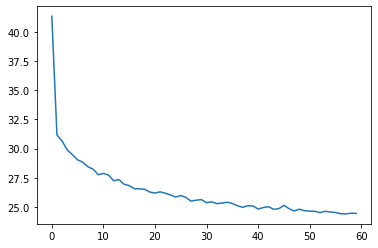

In [30]:
trainLoop(model, trainLoader)

In [31]:
testLoop(model, testLoader)

tensor(0.8065, device='cuda:0')


In [32]:
torch.save(model.state_dict(), "modelVV")